# Load Libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from skimage.feature import hog

# Read Images Path

In [3]:
import os
import pandas as pd

# Define dataset path and categories
dataset_path = 'C:/Users/USER/Desktop/Dataset_BUSI_with_GT'
categories = [['benign', 438], ['malignant', 211], ['normal', 134]]

# List to store data
all_data = []

# Loop through each category and build the DataFrame
for category, num_images in categories:
    folder_path = os.path.join(dataset_path, category)
    
    # Generate paths for images and masks
    for i in range(1, num_images):
        image_path = os.path.join(folder_path, f"{category} ({i}).png")
        mask_path = os.path.join(folder_path, f"{category} ({i})_mask.png")
        
        # Append data to the list
        all_data.append({'Image-Path': image_path, 'Mask-Path': mask_path, 'Label': category})

# Create a DataFrame from the list
data_path_df = pd.DataFrame(all_data)

# Reset index for a clean DataFrame
data_path_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
data_path_df


,Image-Path,Mask-Path,Label
0,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,benign
1,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,benign
2,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,benign
3,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,benign
4,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,benign
...,...,...,...
775,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,normal
776,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,normal
777,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,normal
778,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,normal


# Shuffle Dataset

In [4]:
import pandas as pd

# Split the DataFrame into benign, malignant, and normal categories
benign_df = data_path_df[data_path_df['Label'] == 'benign']  # All benign samples
malignant_df = data_path_df[data_path_df['Label'] == 'malignant']  # All malignant samples
normal_df = data_path_df[data_path_df['Label'] == 'normal']  # All normal samples

# Concatenate all categories
final_df = pd.concat([benign_df, malignant_df, normal_df], axis=0)

# Shuffle the combined DataFrame
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Map labels to numerical values
label_mapping = {'benign': 0, 'malignant': 1, 'normal': 2}
final_df['Label'] = final_df['Label'].map(label_mapping)

# Check label distribution
label_counts = final_df['Label'].value_counts()

# Display final DataFrame and label counts
final_df, label_counts


(                                            Image-Path  \
 0    C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...   
 1    C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...   
 2    C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...   
 3    C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...   
 4    C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...   
 ..                                                 ...   
 775  C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...   
 776  C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...   
 777  C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...   
 778  C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...   
 779  C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...   
 
                                              Mask-Path  Label  
 0    C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...      1  
 1    C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...      1  
 2    C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...      1  
 3    C:/Users/USER/Desktop/Da

In [5]:
final_df = final_df.sample(frac=1)
final_df.reset_index(inplace = True,drop = True)
final_df

,Image-Path,Mask-Path,Label
0,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,2
1,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,0
2,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,0
3,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\nor...,2
4,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,0
...,...,...,...
775,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,0
776,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...,1
777,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\mal...,1
778,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,C:/Users/USER/Desktop/Dataset_BUSI_with_GT\ben...,0


# Read Images & Masks

In [6]:
def load_images_and_mask(image_path,mask_path,target_size = (400,400)) : 
    
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image,target_size)
    mask = cv2.resize(mask,target_size)
    return image,mask

def load_images_NormalImage(image_path,target_size = (400,400)) : 
    image = cv2.imread(image_path)
    image = cv2.resize(image,target_size)
    return image


# VGG Feature Extraction

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the pre-trained VGG16 model (without the top layers for feature extraction)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def vgg_feature_extractor(image_path, mask=None):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)

    # Apply mask if provided
    if mask is not None:
        if mask.shape[:2] != image.shape[:2]:
            raise ValueError("Mask dimensions must match the image dimensions.")
        mask_resized = cv2.resize(mask, (224, 224))
        image = cv2.bitwise_and(image, image, mask=mask_resized.astype(np.uint8))

    # Preprocess the image for VGG16
    image = preprocess_input(image)
    image = np.expand_dims(image, axis=0)

    # Extract features using VGG16
    features = vgg_model.predict(image)
    return features.flatten()


# Preparing Dataset For Training 

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize feature and label lists
X, Y = [], []

# Process each row in the DataFrame
for _, row in final_df.iterrows():
    label = row['Label']
    image_path = row['Image-Path']
    
    if label != 2:  # If not 'normal', load image and mask
        mask_path = row['Mask-Path']
        image, mask = load_images_and_mask(image_path=image_path, mask_path=mask_path)
        features = hog_extractor(image=image, mask=mask)
    else:  # For 'normal' category, load only the image
        image = load_images_NormalImage(image_path=image_path)
        features = hog_extractor(image=image)

    # Append features and label
    X.append(features)
    Y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize feature and label lists
X, Y = [], []

# Process each row in the DataFrame
for _, row in final_df.iterrows():
    label = row['Label']
    image_path = row['Image-Path']
    
    if label != 2:  # If not 'normal', load image and mask
        mask_path = row['Mask-Path']
        
        # Load the mask and resize to 224x224
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is not None:
            mask = cv2.resize(mask, (224, 224))
        
        # Extract features using VGG
        features = vgg_feature_extractor(image_path=image_path, mask=mask)
    else:  # For 'normal' category, load only the image
        # Extract features using VGG
        features = vgg_feature_extractor(image_path=image_path)

    # Append features and label
    X.append(features)
    Y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(f"Feature shape: {X.shape}, Labels shape: {Y.shape}")
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

1/1 [==============================] - 0s 373ms/step
Feature shape: (780, 25088), Labels shape: (780,)
Training set size: (624, 25088), Test set size: (156, 25088)


# Random Forest Model Function

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

def random_forest():
    grid = {
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'criterion': ["gini", "entropy"],
        'max_depth': [None, 10, 20, 30, 40, 50],
    }
    
    estimator = RandomForestClassifier(random_state=42)
    
    # RandomizedSearchCV
    cv_model = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=grid,
        n_iter=100,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the model
    cv_model.fit(X=X_train, y=Y_train.ravel())
    
    # Best parameters and train/test accuracy
    best_params = cv_model.best_params_
    best_model = cv_model.best_estimator_
    
    print(f'\nThe best parameters are: {best_params}\n' + '-' * 78)
    print(f'\nThe train accuracy (CV score) is: {cv_model.best_score_:.4f}\n' + '-' * 78)
    
    # Fixing the score method
    test_accuracy = best_model.score(X_test, Y_test)
    print(f'\nThe test accuracy is: {test_accuracy:.4f}\n' + '-' * 78)
    
    # Additional evaluation metrics on the test set
    Y_pred = best_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))
    
    return best_model


# Evaluation Function

In [29]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, f1_score, cohen_kappa_score, recall_score, precision_score
)

# Initialize the DataFrame outside the function
df = pd.DataFrame(columns=['classifier', "train_accuracy", "val_accuracy", "test_accuracy", 
                           "f1_measure", "kappa_score", "recall", "Precision"])

def evaluate(Y_prediction, name, save_report=False, normalize_conf_matrix=False):
    global df  # Use the global DataFrame

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(
        y_true=Y_test,
        y_pred=Y_prediction,
        normalize='true' if normalize_conf_matrix else None
    )
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix, annot=True, fmt=".2f" if normalize_conf_matrix else "d",
        cmap="Blues", cbar=False, linewidths=0.5, linecolor="gray"
    )
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.title(f"{name} Evaluation", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    # Calculate metrics
    test_accuracy = accuracy_score(Y_test, Y_prediction)
    f1 = f1_score(Y_test, Y_prediction, average='weighted')
    kappa = cohen_kappa_score(Y_test, Y_prediction)
    recall = recall_score(Y_test, Y_prediction, average='weighted')
    precision = precision_score(Y_test, Y_prediction, average='weighted')

    # Append results to the DataFrame
    df = pd.concat([df, pd.DataFrame.from_records([{
        'classifier': name,
        'train_accuracy': None,
        'val_accuracy': None,
        'test_accuracy': test_accuracy,
        'f1_measure': f1,
        'kappa_score': kappa,
        'recall': recall,
        'Precision': precision
    }])], ignore_index=True)


# Random Forest Model

In [21]:
RandomForest_Model = random_forest()
Y_prediction_RFM = RandomForest_Model.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



The best parameters are: {'n_estimators': 50, 'max_depth': 10, 'criterion': 'gini'}
------------------------------------------------------------------------------

The train accuracy (CV score) is: 0.9631
------------------------------------------------------------------------------

The test accuracy is: 0.9615
------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        89
           1       1.00      0.86      0.92        42
           2       1.00      1.00      1.00        25

    accuracy                           0.96       156
   macro avg       0.98      0.95      0.96       156
weighted avg       0.96      0.96      0.96       156


Confusion Matrix:
[[89  0  0]
 [ 6 36  0]
 [ 0  0 25]]


# Evaluate Random Forest Model

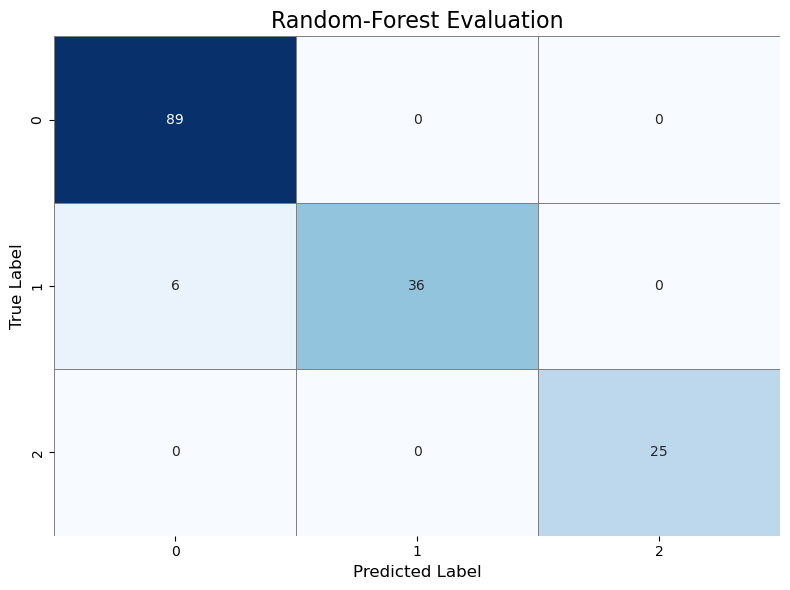

In [30]:
evaluate(Y_prediction=Y_prediction_RFM,name='Random-Forest')